### Confidence Interval - Difference In Means

Here you will look through the example from the last video, but you will also go a couple of steps further into what might actually be going on with this data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('02-Dataset/coffee_dataset.csv')
sample_data = full_data.sample(200)

In [2]:
# Printing the first 5 rows
sample_data.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers.  Build a 99% confidence interval using your sampling distribution.  Use your interval to start answering the first quiz question below.

In [3]:
# Initializing a variable to store the differences.
diff_heights = []

# Loop to create 10,000 samples of 200.
for index in range(10000):
    # Sampling 200 "elements" of full_data.
    sample = full_data.sample(200, replace = True)

    # Coffee Drinkers
    avg_coffee_drinkers = sample[sample.drinks_coffee].height.mean()

    # Non Coffee Drinkers
    avg_non_coffee_drinkers = sample[np.logical_not(sample.drinks_coffee)].height.mean()
    
    # Difference of Heights
    diff = avg_coffee_drinkers - avg_non_coffee_drinkers
    
    # Append diff in the list.
    diff_heights.append(diff)

In [4]:
np.percentile(diff_heights, 0.5), np.percentile(diff_heights, 99.5)

(0.7804195541448713, 3.106433097032148)

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution.  Use your interval to finish answering the first quiz question below.  

In [5]:
# Initializing a variable to store the differences.
diff_heights_age = []

# Loop to create 10,000 samples of 200.
for index in range(10000):
    # Sampling 200 "elements" of full_data.
    sample = full_data.sample(200, replace = True)

    # Older than 21
    avg_older_drinkers = sample.query("age == '>=21'").height.mean()

    # Younger
    avg_young_drinkers = sample.query("age == '<21'").height.mean()
    
    # Difference of Heights
    diff = avg_older_drinkers - avg_young_drinkers
    
    # Append diff in the list.
    diff_heights_age.append(diff)

In [6]:
np.percentile(diff_heights_age, 0.5), np.percentile(diff_heights_age, 99.5)

(2.932526071671697, 4.828636266272854)

`3.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **under** 21 years old.  Using your sampling distribution, build a 95% confidence interval.  Use your interval to start answering question 2 below.

In [29]:
# Initializing a variable to store the differences.
diff_heights_young_drinkers = []
avg_21_non_coffee_drinkers = []
avg_21_coffee_drinkers = []
diff_heights_young_drinkers2 = []

# Loop to create 10,000 samples of 200.
for index in range(10000):
    # Sampling 200 "elements" of full_data.
    sample = full_data.sample(200, replace = True)

    # Older than 21
    avg_young_coffee_drinkers = sample.query("age == '<21'").query("drinks_coffee == True").height.mean()

    # Younger
    avg_young_non_coffee_drinkers = sample.query("age == '<21'").query("drinks_coffee == False").height.mean()
    
    # Difference of Heights
    diff = avg_young_coffee_drinkers - avg_young_non_coffee_drinkers
    
    diff2 = avg_young_non_coffee_drinkers - avg_young_coffee_drinkers
    
    # Append diff in the list.
    diff_heights_young_drinkers.append(diff)
    avg_21_non_coffee_drinkers.append(avg_young_non_coffee_drinkers)
    avg_21_coffee_drinkers.append(avg_young_coffee_drinkers)
    diff_heights_young_drinkers2.append(diff2)

In [5]:
import seaborn as sns
import matplotlib.pylab as plt

C:\Users\ander\AppData\Local\Programs\Python\Python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


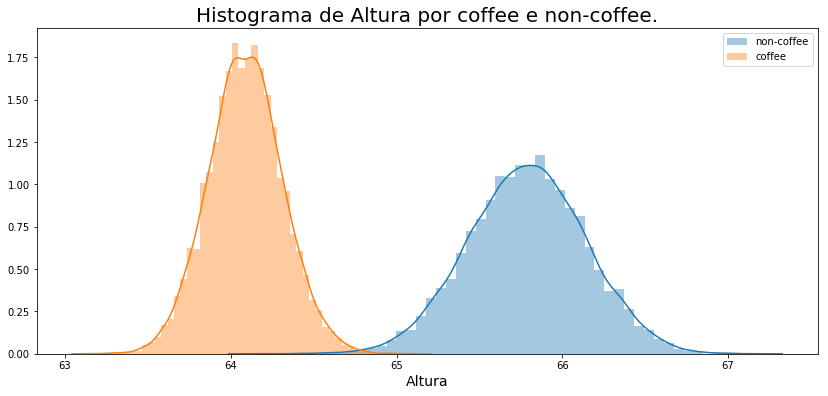

In [9]:
#sns.distplot(diff_heights_young_drinkers);
plt.figure(figsize = [14, 6])
sns.distplot(avg_21_non_coffee_drinkers);
sns.distplot(avg_21_coffee_drinkers);
plt.legend(['non-coffee','coffee']);
plt.title("Histograma de Altura por coffee e non-coffee.", fontsize = 20);
plt.xlabel("Altura", fontsize = 14);

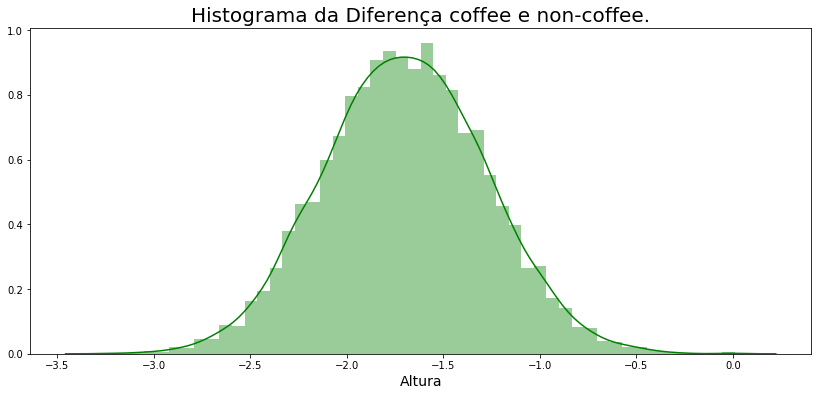

In [10]:
plt.figure(figsize = [14, 6])
sns.distplot(diff_heights_young_drinkers, color = 'green');
plt.title("Histograma da Diferença coffee e non-coffee.", fontsize = 20);
plt.xlabel("Altura", fontsize = 14);

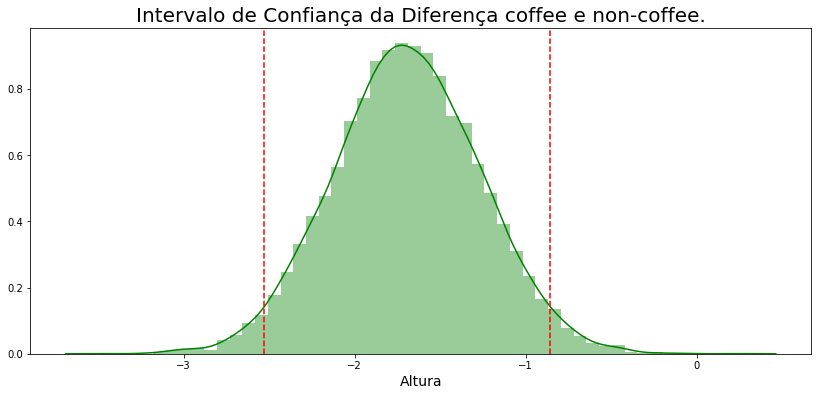

In [32]:
plt.figure(figsize = [14, 6])
sns.distplot(diff_heights_young_drinkers, color = 'green');
plt.title("Intervalo de Confiança da Diferença coffee e non-coffee.", fontsize = 20);
plt.xlabel("Altura", fontsize = 14);
plt.axvline(x = np.percentile(diff_heights_young_drinkers, 2.5), color = 'r', linestyle = 'dashed');
plt.axvline(x = np.percentile(diff_heights_young_drinkers, 97.5), color = 'r', linestyle = 'dashed');

In [25]:
map(lambda x : x + 1, diff_heights_young_drinkers)

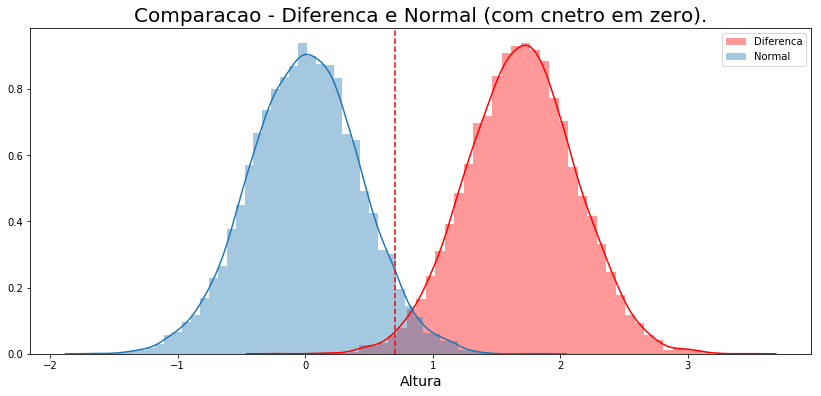

In [58]:
plt.figure(figsize = [14, 6])
sns.distplot(diff_heights_young_drinkers2, color = 'red');
df_normal = np.random.normal(0, np.std(diff_heights_young_drinkers), 10000)
sns.distplot(df_normal)
plt.legend(['Diferenca','Normal'])
plt.title("Comparacao - Diferenca e Normal (com cnetro em zero).", fontsize = 20);
plt.axvline(x = np.percentile(df_normal, 95.0), color = 'r', linestyle = 'dashed');
plt.xlabel("Altura", fontsize = 14);
plt.show()

In [43]:
(df_normal > np.mean(diff_heights_young_drinkers2)).mean()

0.0

In [12]:
np.percentile(diff_heights_young_drinkers, 2.5), np.percentile(diff_heights_young_drinkers, 97.5)

(-2.4972231518682833, -0.8758191572224626)

`4.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **over** 21 years old.  Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions. 

In [13]:
# Initializing a variable to store the differences.
diff_heights_older_drinkers = []

# Loop to create 10,000 samples of 200.
for index in range(10000):
    # Sampling 200 "elements" of full_data.
    sample = full_data.sample(200, replace = True)

    # Older than 21
    avg_old_coffee_drinkers = sample.query("age == '>=21'").query("drinks_coffee == True").height.mean()

    # Younger
    avg_old_non_coffee_drinkers = sample.query("age == '>=21'").query("drinks_coffee == False").height.mean()
    
    # Difference of Heights
    diff = avg_old_coffee_drinkers - avg_old_non_coffee_drinkers
    
    # Append diff in the list.
    diff_heights_older_drinkers.append(diff)

In [14]:
np.percentile(diff_heights_older_drinkers, 2.5), np.percentile(diff_heights_older_drinkers, 97.5)

(-3.2734486797317035, -0.6111639620218751)

In [15]:
sample_data.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


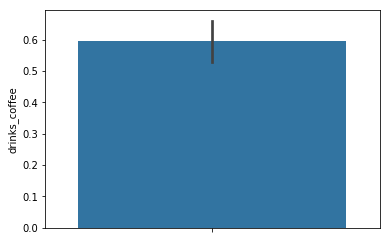

In [16]:
sns.barplot(data = sample_data, y = 'drinks_coffee', hue = 'drinks_coffee')